In [1]:
from google.colab import drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd "drive/My Drive/Rating Prediction"

/content/drive/My Drive/Rating Prediction


In [3]:
!ls

14056673.csv  rating_predictor.ipynb


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("14056673.csv")


In [6]:
df.tail()

,Unnamed: 0,Date,Rating
468,500,2008-12-21,631
469,501,2008-12-14,538
470,502,2008-12-06,549
471,503,2008-11-30,476
472,504,2008-11-23,493


In [7]:
df.reset_index()

,index,Unnamed: 0,Date,Rating
0,0,0,2020-07-26,2583
1,1,11,2020-03-08,2612
2,2,13,2020-02-23,2611
3,3,14,2020-02-09,2592
4,4,15,2020-01-25,2569
...,...,...,...,...
468,468,500,2008-12-21,631
469,469,501,2008-12-14,538
470,470,502,2008-12-06,549
471,471,503,2008-11-30,476


In [19]:
df1 = df.reset_index()['Rating']
df1 = df1[::-1]
df1 = df1.reset_index()['Rating']

In [20]:
df1.shape

(473,)

In [21]:
df1.head()

0    493
1    476
2    549
3    538
4    631
Name: Rating, dtype: int64

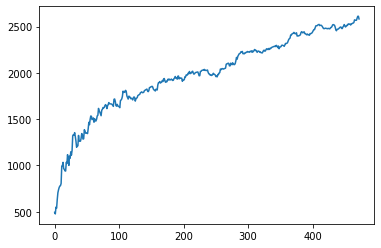

In [22]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [24]:
df1

array([[0.0079588 ],
       [0.        ],
       [0.03417603],
       [0.02902622],
       [0.07256554],
       [0.10720974],
       [0.12219101],
       [0.13389513],
       [0.1409176 ],
       [0.14279026],
       [0.15402622],
       [0.2420412 ],
       [0.24438202],
       [0.26076779],
       [0.22846442],
       [0.22565543],
       [0.21769663],
       [0.2167603 ],
       [0.26076779],
       [0.25514981],
       [0.29962547],
       [0.26685393],
       [0.24531835],
       [0.29213483],
       [0.28183521],
       [0.31413858],
       [0.29728464],
       [0.32116105],
       [0.39513109],
       [0.40074906],
       [0.3988764 ],
       [0.41104869],
       [0.39185393],
       [0.36844569],
       [0.33707865],
       [0.34550562],
       [0.34456929],
       [0.39700375],
       [0.36844569],
       [0.36750936],
       [0.36797753],
       [0.38249064],
       [0.40636704],
       [0.4002809 ],
       [0.37827715],
       [0.38014981],
       [0.42602996],
       [0.419

In [34]:
ts = int(len(df1) * 0.7)
tes = len(df1) - ts
train, test = df1[0: ts,:], df1[ts: len(df1), :1]

In [42]:
test

array([[0.83146067],
       [0.83707865],
       [0.83192884],
       [0.83801498],
       [0.83661049],
       [0.84035581],
       [0.84316479],
       [0.84456929],
       [0.84550562],
       [0.84691011],
       [0.84831461],
       [0.84644195],
       [0.8511236 ],
       [0.85252809],
       [0.84737828],
       [0.84129213],
       [0.84925094],
       [0.83567416],
       [0.84316479],
       [0.84503745],
       [0.84644195],
       [0.85299625],
       [0.85346442],
       [0.85252809],
       [0.85065543],
       [0.84784644],
       [0.85533708],
       [0.86235955],
       [0.86189139],
       [0.86329588],
       [0.8656367 ],
       [0.87359551],
       [0.88249064],
       [0.88670412],
       [0.88951311],
       [0.90496255],
       [0.90496255],
       [0.91058052],
       [0.91198502],
       [0.91432584],
       [0.91807116],
       [0.91526217],
       [0.91104869],
       [0.91198502],
       [0.9161985 ],
       [0.89981273],
       [0.90074906],
       [0.900

In [35]:
ts, tes

(331, 142)

In [36]:
# Take into consideration the last 5 tournaments for the LSTM
# Maybe you have some momentum or maybe you are in a Slump
# 5 tourneys gives a larger consideration to your overall play

In [43]:
def data_split(dataset, timestep):
  X, y = [], []
  for i in range(len(dataset) - timestep-1):
    a = dataset[i: (i+timestep), 0]
    X.append(a)
    y.append(dataset[i + timestep, 0])
  return np.array(X), np.array(y)

In [44]:
time_step = 5
X_train, y_train = data_split(train, time_step)
X_test, y_test = data_split(test, time_step)

In [45]:
X_train

array([[0.0079588 , 0.        , 0.03417603, 0.02902622, 0.07256554],
       [0.        , 0.03417603, 0.02902622, 0.07256554, 0.10720974],
       [0.03417603, 0.02902622, 0.07256554, 0.10720974, 0.12219101],
       ...,
       [0.81460674, 0.82116105, 0.82724719, 0.82818352, 0.82303371],
       [0.82116105, 0.82724719, 0.82818352, 0.82303371, 0.82537453],
       [0.82724719, 0.82818352, 0.82303371, 0.82537453, 0.83286517]])

In [46]:
y_train

array([0.10720974, 0.12219101, 0.13389513, 0.1409176 , 0.14279026,
       0.15402622, 0.2420412 , 0.24438202, 0.26076779, 0.22846442,
       0.22565543, 0.21769663, 0.2167603 , 0.26076779, 0.25514981,
       0.29962547, 0.26685393, 0.24531835, 0.29213483, 0.28183521,
       0.31413858, 0.29728464, 0.32116105, 0.39513109, 0.40074906,
       0.3988764 , 0.41104869, 0.39185393, 0.36844569, 0.33707865,
       0.34550562, 0.34456929, 0.39700375, 0.36844569, 0.36750936,
       0.36797753, 0.38249064, 0.40636704, 0.4002809 , 0.37827715,
       0.38014981, 0.42602996, 0.41994382, 0.4082397 , 0.40917603,
       0.40870787, 0.40636704, 0.43117978, 0.46348315, 0.45131086,
       0.47799625, 0.49531835, 0.49391386, 0.47705993, 0.48080524,
       0.48548689, 0.46395131, 0.48127341, 0.47050562, 0.47003745,
       0.47893258, 0.49578652, 0.49906367, 0.53370787, 0.52106742,
       0.51544944, 0.50655431, 0.49672285, 0.52481273, 0.52855805,
       0.53838951, 0.53651685, 0.53885768, 0.54868914, 0.55290

In [47]:
X_test

array([[0.83146067, 0.83707865, 0.83192884, 0.83801498, 0.83661049],
       [0.83707865, 0.83192884, 0.83801498, 0.83661049, 0.84035581],
       [0.83192884, 0.83801498, 0.83661049, 0.84035581, 0.84316479],
       [0.83801498, 0.83661049, 0.84035581, 0.84316479, 0.84456929],
       [0.83661049, 0.84035581, 0.84316479, 0.84456929, 0.84550562],
       [0.84035581, 0.84316479, 0.84456929, 0.84550562, 0.84691011],
       [0.84316479, 0.84456929, 0.84550562, 0.84691011, 0.84831461],
       [0.84456929, 0.84550562, 0.84691011, 0.84831461, 0.84644195],
       [0.84550562, 0.84691011, 0.84831461, 0.84644195, 0.8511236 ],
       [0.84691011, 0.84831461, 0.84644195, 0.8511236 , 0.85252809],
       [0.84831461, 0.84644195, 0.8511236 , 0.85252809, 0.84737828],
       [0.84644195, 0.8511236 , 0.85252809, 0.84737828, 0.84129213],
       [0.8511236 , 0.85252809, 0.84737828, 0.84129213, 0.84925094],
       [0.85252809, 0.84737828, 0.84129213, 0.84925094, 0.83567416],
       [0.84737828, 0.84129213, 0.

In [48]:
X_test.shape

(136, 5)

In [49]:
X_train.shape

(325, 5)

In [50]:
y_test.shape

(136,)

In [51]:
y_train.shape

(325,)

In [53]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [56]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.LSTM(50, return_sequences=True, input_shape=(5, 1)))
model.add(keras.layers.LSTM(50, return_sequences=True))
model.add(keras.layers.LSTM(50))
model.add(keras.layers.Dense(1))

In [58]:
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 50)             10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 50)             20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=20, verbose=1)

Epoch 1/50
17/17 [==============================] - 1s 57ms/step - loss: 0.2150 - val_loss: 0.0035
Epoch 2/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0201 - val_loss: 0.0657
Epoch 3/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0083 - val_loss: 0.0105
Epoch 4/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 0.0100
Epoch 5/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0107
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0041
Epoch 7/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 8/50
17/17 [==============================] - 0s 7ms/step - loss: 8.9240e-04 - val_loss: 2.6870e-04
Epoch 9/50
17/17 [==============================] - 0s 7ms/step - loss: 5.4098e-04 - val_loss: 1.6756e-04
Epoch 10/50
17/17 [==============================] - 0s 7ms/step - loss: 3.9284e-04 - val_loss: 1.192

In [61]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [62]:
# Back into original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [64]:
from sklearn.metrics import mean_squared_error

ERROR = np.sqrt(mean_squared_error(y_train, train_predict))
ERROR

1838.171304402525

In [65]:
from sklearn.metrics import mean_squared_error

TERROR = np.sqrt(mean_squared_error(y_test, test_predict))
TERROR

2451.487283858611

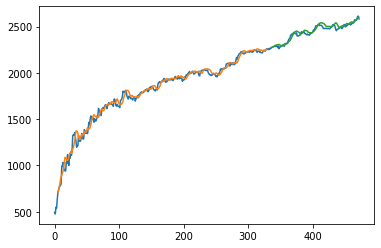

In [71]:
look_back=5
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig("praveen_rating.png")
plt.show()

In [78]:
len(test)

142

In [133]:
x_input=test[42:].reshape(1,-1)
x_input.shape


(1, 100)

In [134]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [135]:
temp_input

[0.9110486891385767,
 0.9119850187265919,
 0.9161985018726593,
 0.8998127340823969,
 0.9007490636704121,
 0.9002808988764046,
 0.901685393258427,
 0.9040262172284645,
 0.9058988764044944,
 0.9176029962546817,
 0.9218164794007491,
 0.9190074906367041,
 0.9157303370786518,
 0.9199438202247192,
 0.9208801498127341,
 0.9119850187265919,
 0.9110486891385767,
 0.9087078651685394,
 0.9058988764044944,
 0.9101123595505618,
 0.9063670411985019,
 0.9063670411985019,
 0.9035580524344569,
 0.9119850187265919,
 0.9119850187265919,
 0.9133895131086143,
 0.9157303370786518,
 0.9208801498127341,
 0.9274344569288391,
 0.9325842696629214,
 0.9325842696629214,
 0.9414794007490637,
 0.9513108614232211,
 0.9517790262172285,
 0.952247191011236,
 0.9555243445692885,
 0.9573970037453183,
 0.958801498127341,
 0.9527153558052435,
 0.9541198501872659,
 0.955056179775281,
 0.952247191011236,
 0.9485018726591761,
 0.9424157303370786,
 0.9377340823970037,
 0.9372659176029963,
 0.9386704119850187,
 0.939606741573033